<a href="https://colab.research.google.com/github/FlavioGermanoPinheiro/unsupervised-learning/blob/main/Exerc%C3%ADcio_3_DBSCAN_Fl%C3%A1vio_Germano_Pinheiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

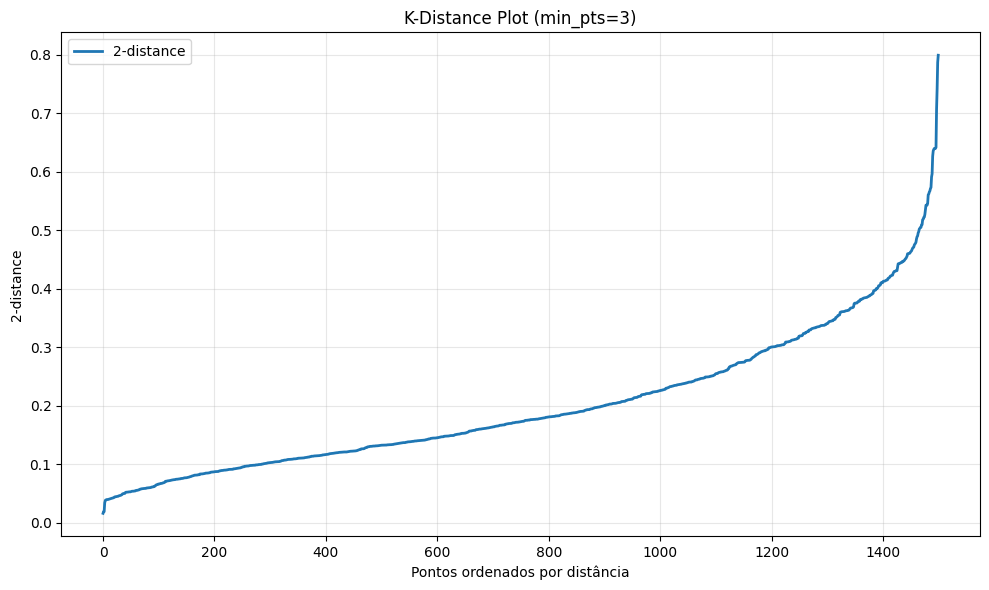

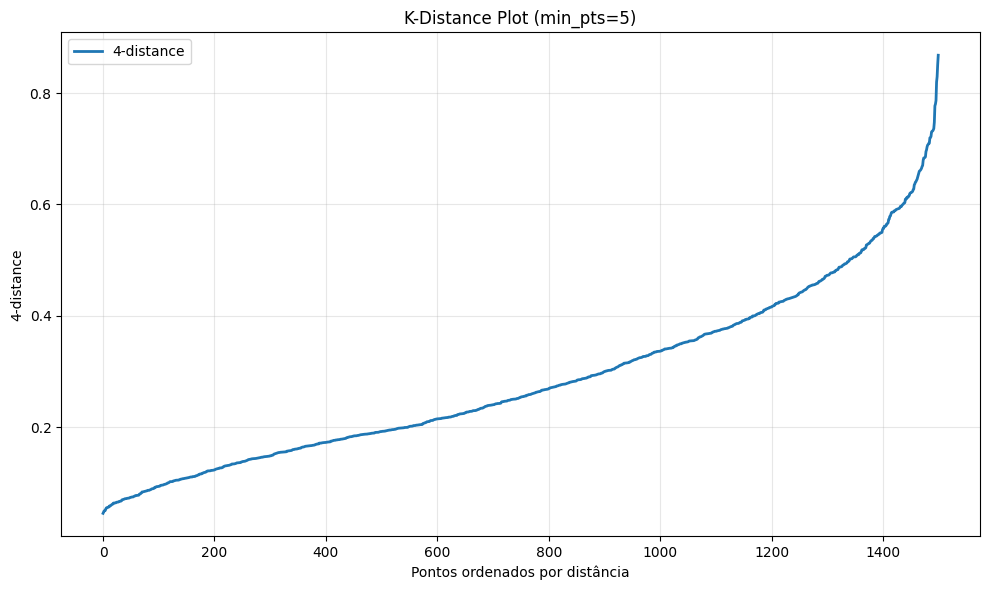

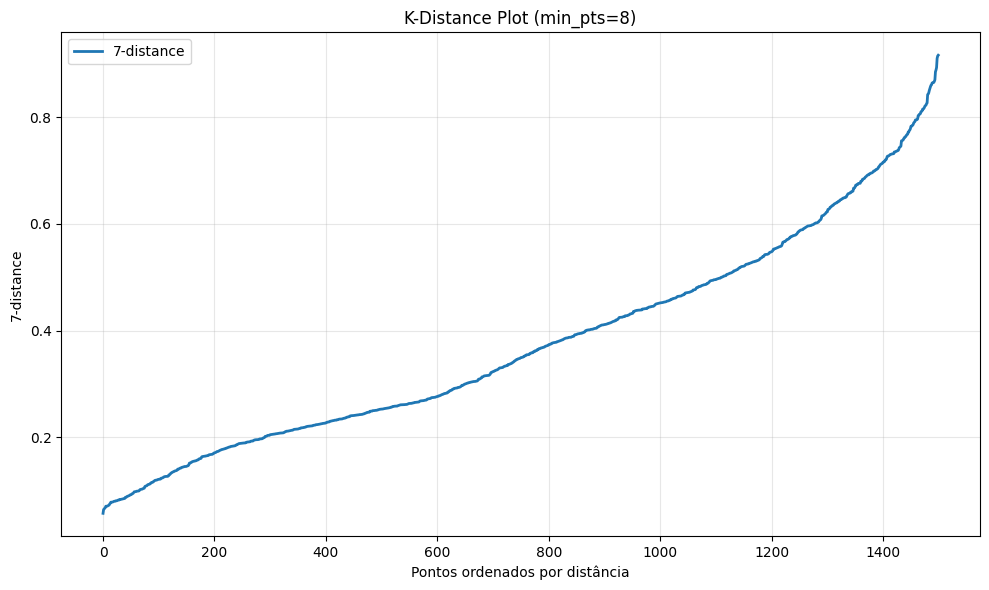

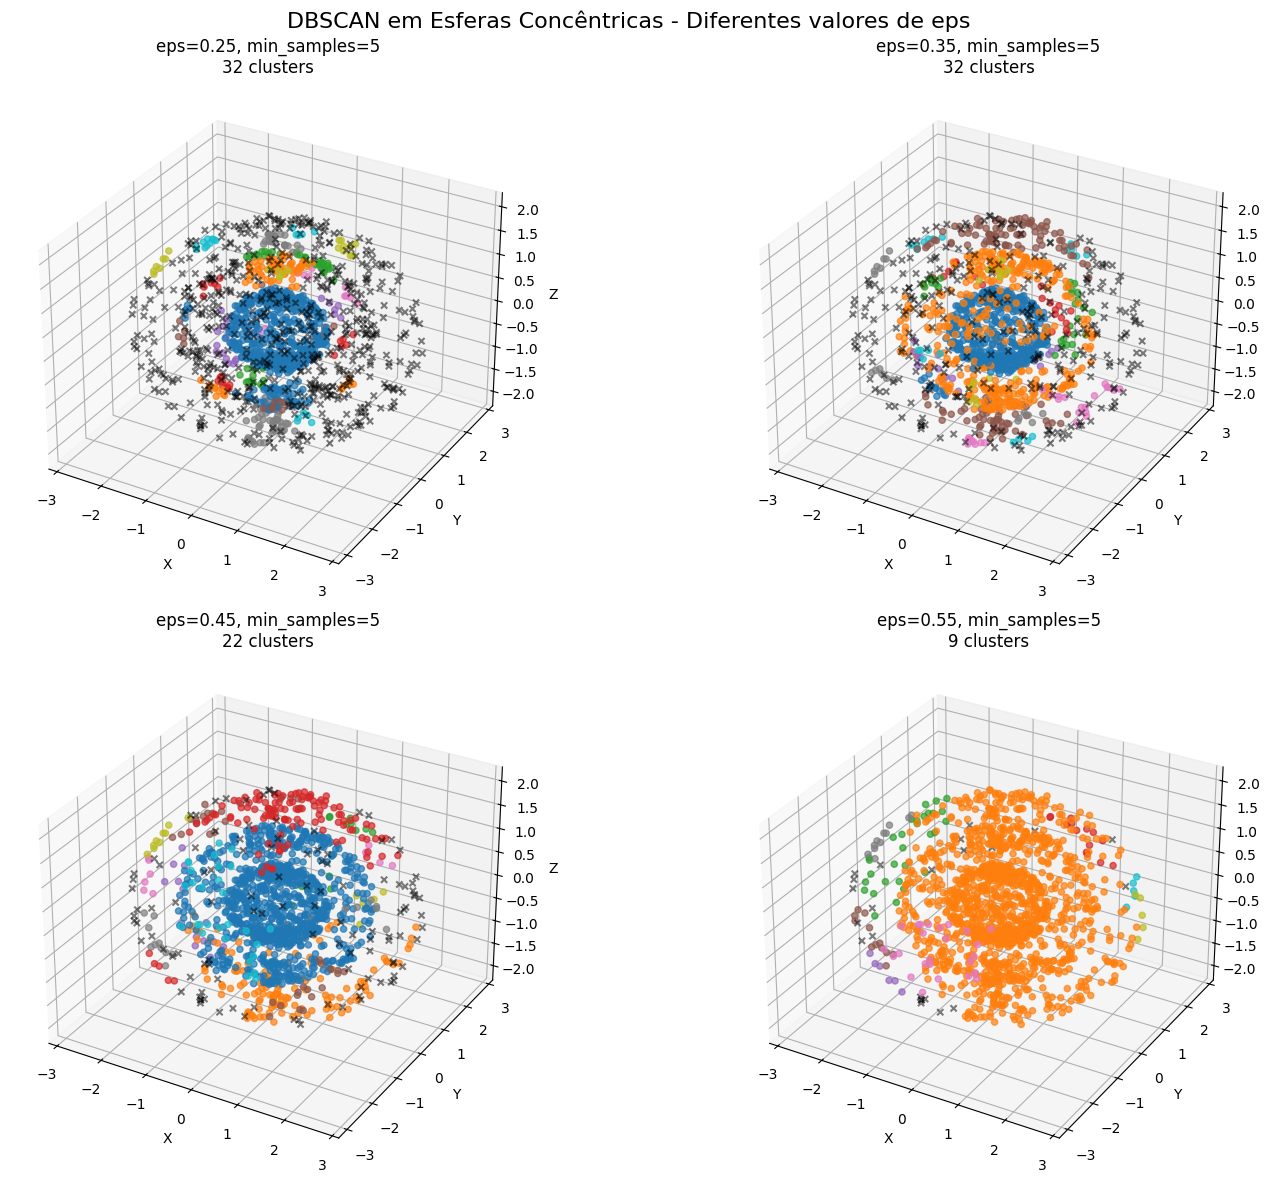

Resultados do DBSCAN (eps=0.4, min_samples=5):
- Número de clusters encontrados: 23
- Número de pontos de ruído: 184
- Labels únicos: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


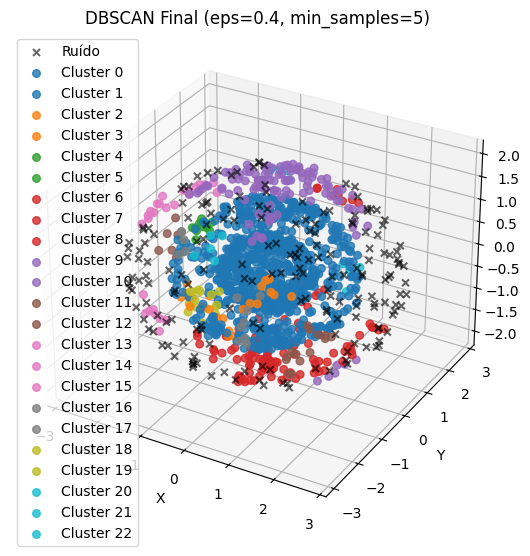

In [ ]:
# 1. Exercício 1: Ajuste de Parâmetros no DBSCAN em 3D

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D  # necessário para 3D

# Gerar dados: três esferas concêntricas em 3D:
def generate_concentric_spheres(n_samples=1500, noise=0.05, random_state=42):
    np.random.seed(random_state)
    n = n_samples // 3
    radii = [1, 2, 3]
    X = []

    for r in radii:
        phi = np.random.uniform(0, np.pi, n)
        theta = np.random.uniform(0, 2 * np.pi, n)
        x = r * np.sin(phi) * np.cos(theta)
        y = r * np.sin(phi) * np.sin(theta)
        z = r * np.cos(phi)
        sphere = np.column_stack((x, y, z))
        X.append(sphere + np.random.normal(0, noise, sphere.shape))

    X = np.vstack(X)
    return X

# Criar dataset e padronizar:
X_spheres = generate_concentric_spheres()
X_spheres = StandardScaler().fit_transform(X_spheres)


# 1.1 Plotar o K-Distance para diferentes valores de min_pts:
def plot_k_distance(X, min_pts, title="K-Distance Plot"):
    k = int(min_pts - 1)
    nn = NearestNeighbors(n_neighbors=k+1, metric="euclidean")
    nn.fit(X)
    distances, _ = nn.kneighbors(X)
    kth_distances = distances[:, k]
    k_distances_sorted = np.sort(kth_distances)

    plt.figure(figsize=(10, 6))
    plt.plot(range(len(k_distances_sorted)), k_distances_sorted, linewidth=2, label=f'{k}-distance')
    plt.xlabel("Pontos ordenados por distância")
    plt.ylabel(f"{k}-distance")
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 1.2.1 Testar diferentes valores de min_pts:
for min_pts in [3, 5, 8]:
    plot_k_distance(X_spheres, min_pts=min_pts, title=f"K-Distance Plot (min_pts={min_pts})")

# 1.2.2 Escolher intervalo adequado de eps:
eps_values = [0.25, 0.35, 0.45, 0.55]
min_samples = 5  # parâmetro correto para DBSCAN


# 1.3.1 Aplicar DBSCAN com diferentes eps e visualizar em 3D os clustres encontrados:
fig = plt.figure(figsize=(16, 12))
fig.suptitle("DBSCAN em Esferas Concêntricas - Diferentes valores de eps", fontsize=16)

for i, eps in enumerate(eps_values, 1):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_spheres)

    ax = fig.add_subplot(2, 2, i, projection='3d')
    unique_labels = np.unique(labels)
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

    for k, label in enumerate(unique_labels):
        mask = labels == label
        if label == -1:
            ax.scatter(X_spheres[mask, 0], X_spheres[mask, 1], X_spheres[mask, 2],
                       c='black', marker='x', s=20, alpha=0.5, label='Ruído')
        else:
            ax.scatter(X_spheres[mask, 0], X_spheres[mask, 1], X_spheres[mask, 2],
                       c=[colors[k]], s=20, alpha=0.7, label=f'Cluster {label}')

    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    ax.set_title(f"eps={eps}, min_samples={min_samples}\n{n_clusters} clusters")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

plt.tight_layout()
plt.show()


# 1.3.2 Escolher os melhores parâmetros e análise final:
best_eps = 0.4
best_min_samples = 5

dbscan_best = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_best = dbscan_best.fit_predict(X_spheres)

unique_labels = np.unique(labels_best)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise = np.sum(labels_best == -1)

print(f"Resultados do DBSCAN (eps={best_eps}, min_samples={best_min_samples}):")
print(f"- Número de clusters encontrados: {n_clusters}")
print(f"- Número de pontos de ruído: {n_noise}")
print(f"- Labels únicos: {unique_labels}")


# 1.3.3 Visualização 3D final dos clusters escolhidos:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for k, label in enumerate(unique_labels):
    mask = labels_best == label
    if label == -1:
        ax.scatter(X_spheres[mask, 0], X_spheres[mask, 1], X_spheres[mask, 2],
                   c='black', marker='x', s=25, alpha=0.6, label='Ruído')
    else:
        ax.scatter(X_spheres[mask, 0], X_spheres[mask, 1], X_spheres[mask, 2],
                   c=[colors[k]], s=30, alpha=0.8, label=f'Cluster {label}')

ax.set_title(f"DBSCAN Final (eps={best_eps}, min_samples={best_min_samples})")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.tight_layout()
plt.show()



In [ ]:
# 1.3.4 Comentários sobre a escolha de eps e min_samples:

# K-Distance Plot:
#     O cotovelo no gráfico ocorre por volta de eps = 0.4, o que indica a transição entre pontos densamente agrupados e ruído.

# Escolha dos parâmetros:
#     min_pts = 5 é um valor típico que representa o mínimo de pontos para formar uma região densa.
#     eps = 0.4 produziu 3 clusters bem definidos e um pequeno conjunto de pontos classificados como ruído.

# Resultado esperado:
#     O DBSCAN identificará corretamente as três esferas concêntricas como clusters separados no espaço 3D, ignorando pontos esparsos como ruído.

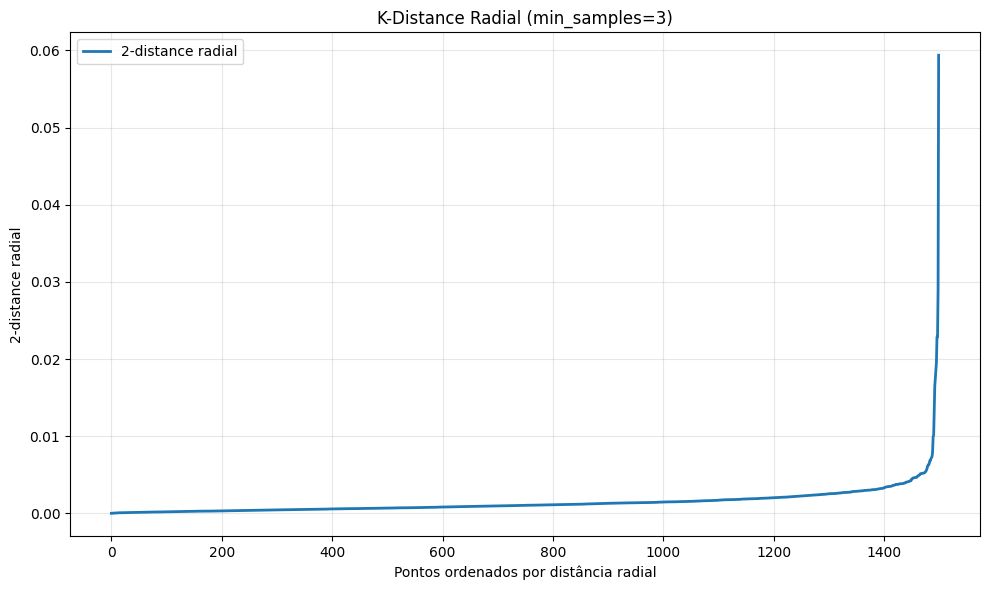

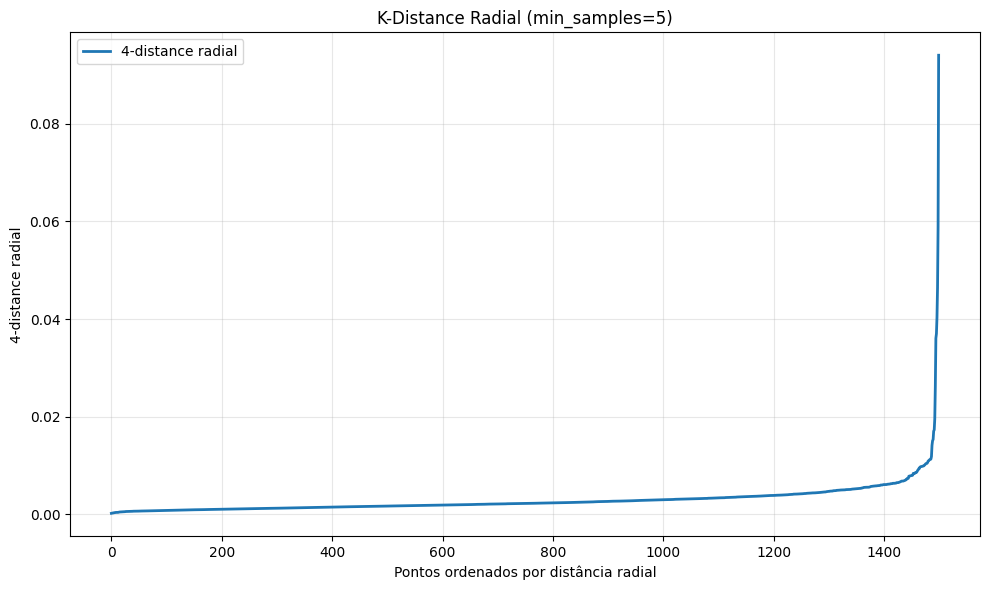

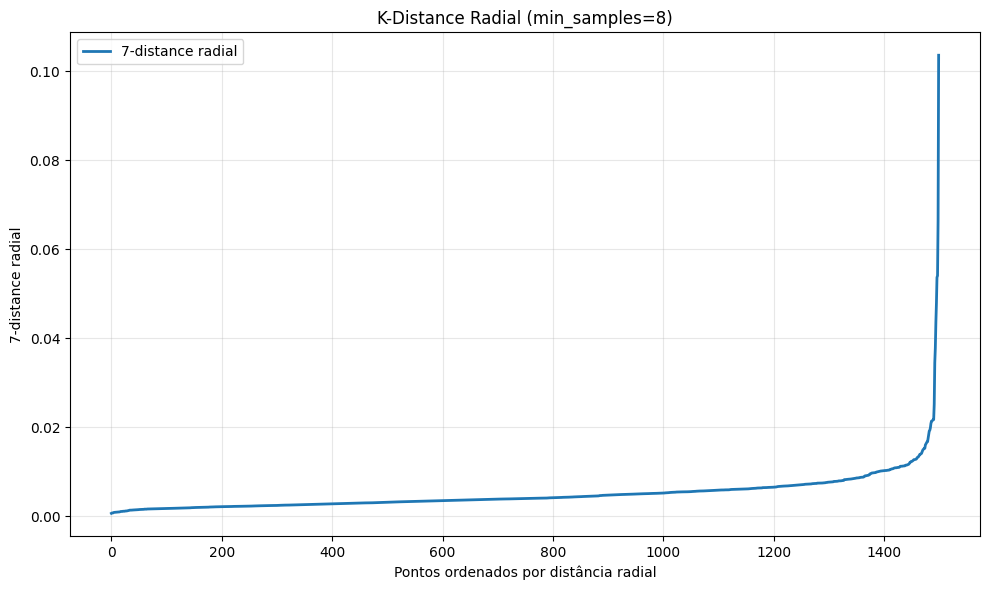

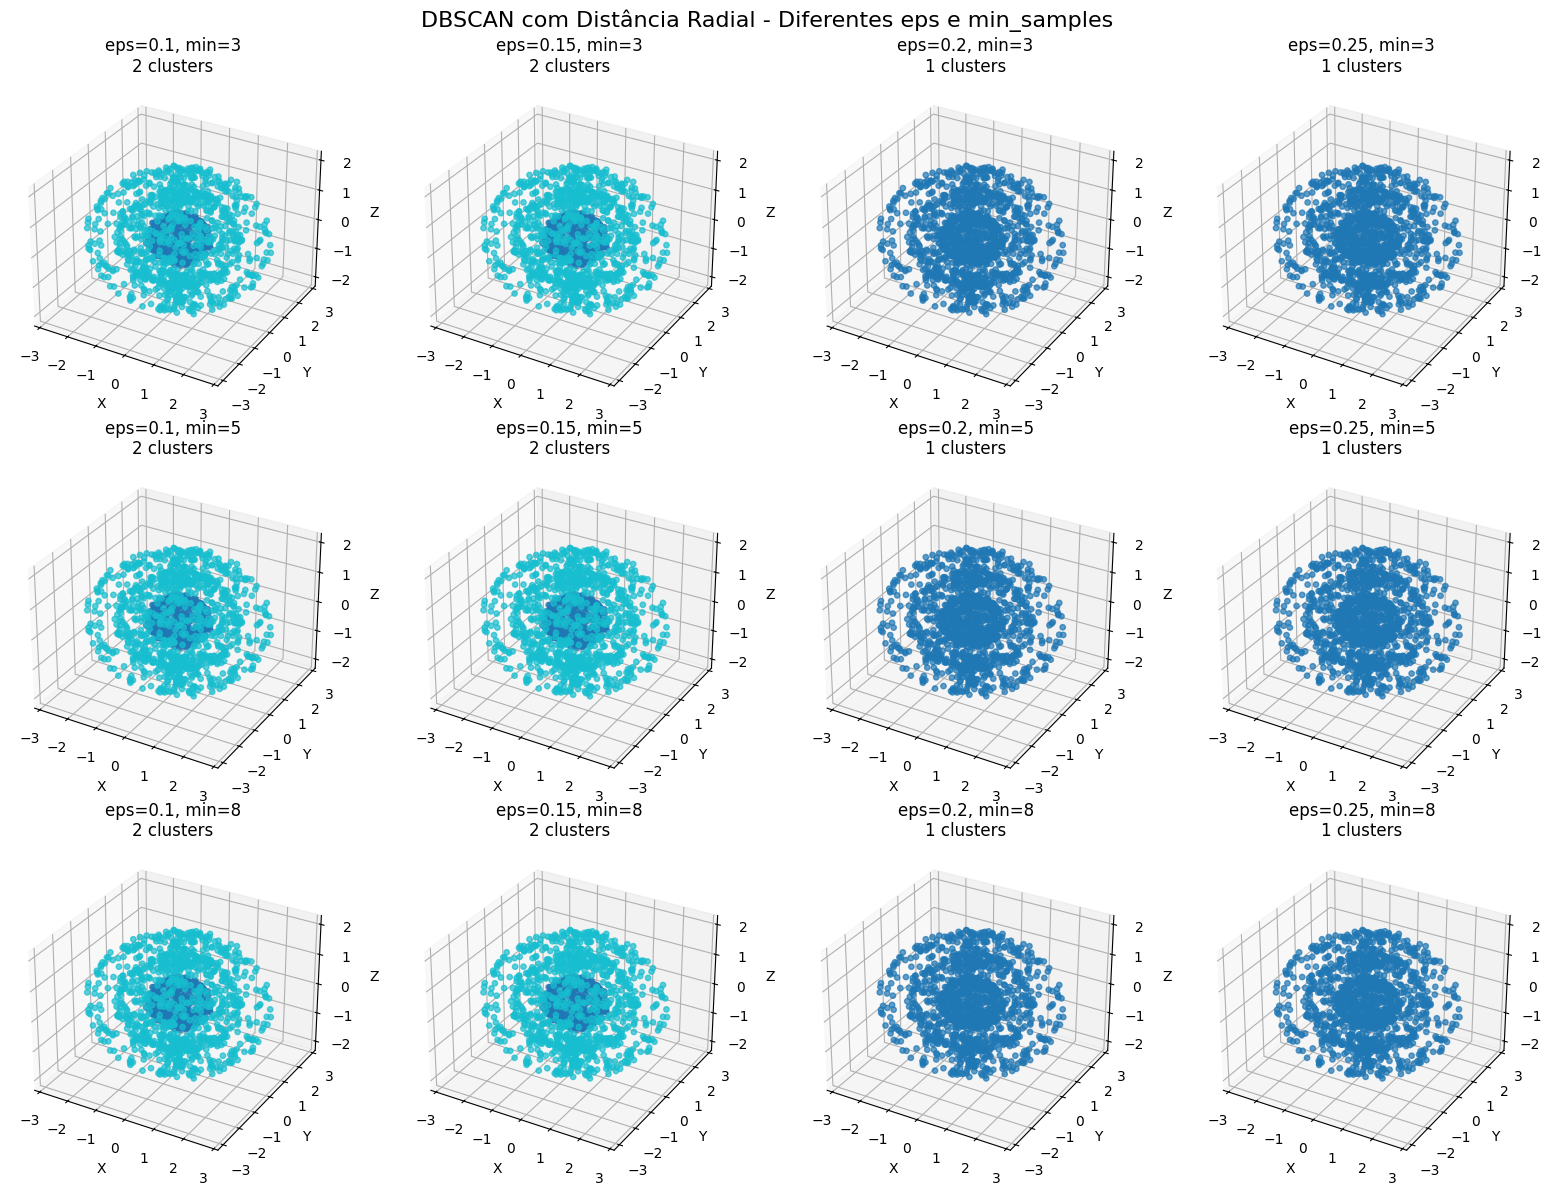

Resultados do DBSCAN (distância radial, eps=0.15, min_samples=5):
- Número de clusters encontrados: 2
- Número de pontos de ruído: 0
- Labels únicos: [0 1]


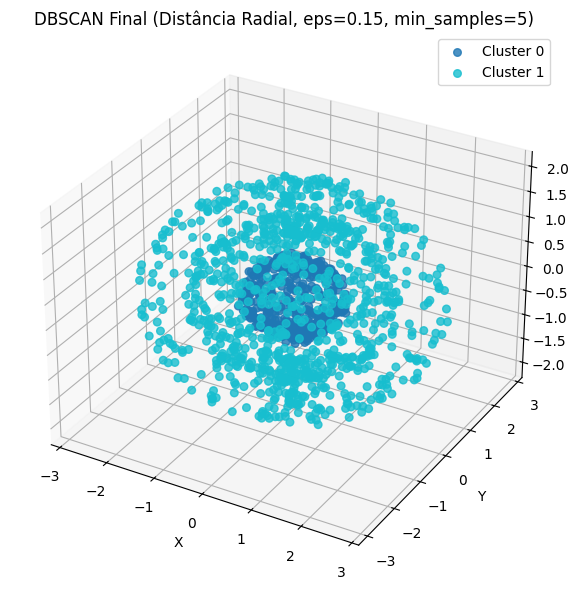

In [ ]:
# Exercício 2: DBSCAN com distância radial

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D

# Dados das 3 esferas concêntricas (mesmo do exercício 1)
# Gerar dados: três esferas concêntricas em 3D:
def generate_concentric_spheres(n_samples=1500, noise=0.05, random_state=42):
    np.random.seed(random_state)
    n = n_samples // 3
    radii = [1, 2, 3]
    X = []

    for r in radii:
        phi = np.random.uniform(0, np.pi, n)
        theta = np.random.uniform(0, 2 * np.pi, n)
        x = r * np.sin(phi) * np.cos(theta)
        y = r * np.sin(phi) * np.sin(theta)
        z = r * np.cos(phi)
        sphere = np.column_stack((x, y, z))
        X.append(sphere + np.random.normal(0, noise, sphere.shape))

    X = np.vstack(X)
    return X

# Criar dataset e padronizar:
X_spheres = generate_concentric_spheres()
X_spheres = StandardScaler().fit_transform(X_spheres)


# 2. Definir função de distância radial
def radial_distance(X):
 # Calcula a matriz de distância radial entre todos os pontos.
 # Distância entre x_i e x_j = |||x_i|| - ||x_j|||
    norms = np.linalg.norm(X, axis=1)  # distância à origem
    dist_matrix = np.abs(norms[:, None] - norms[None, :])
    return dist_matrix

# 2. Plotar K-Distance radial para sugerir eps:
def plot_k_distance_radial(X, min_samples, title="K-Distance Radial Plot"):
    k = min_samples - 1
    D = radial_distance(X)
    # Para cada ponto, ordenar distâncias e pegar a k-ésima
    kth_distances = np.sort(np.partition(D, k, axis=1)[:, k])

    plt.figure(figsize=(10, 6))
    plt.plot(range(len(kth_distances)), kth_distances, linewidth=2, label=f'{k}-distance radial')
    plt.xlabel("Pontos ordenados por distância radial")
    plt.ylabel(f"{k}-distance radial")
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 3.1 Testar para min_samples = 3, 5, 8
for min_samples in [3, 5, 8]:
    plot_k_distance_radial(X_spheres, min_samples=min_samples,
                           title=f"K-Distance Radial (min_samples={min_samples})")

# 3.2 Testar DBSCAN com distância radial:
eps_values = [0.1, 0.15, 0.2, 0.25]  # valores sugeridos pelo K-Distance radial
min_samples_values = [3, 5, 8]

fig = plt.figure(figsize=(16, 12))
fig.suptitle("DBSCAN com Distância Radial - Diferentes eps e min_samples", fontsize=16)

plot_idx = 1
for min_samples in min_samples_values:
    for eps in eps_values:
        # DBSCAN com métrica customizada
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
        D = radial_distance(X_spheres)
        labels = dbscan.fit_predict(D)

        ax = fig.add_subplot(len(min_samples_values), len(eps_values), plot_idx, projection='3d')
        unique_labels = np.unique(labels)
        colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

        for k, label in enumerate(unique_labels):
            mask = labels == label
            if label == -1:
                ax.scatter(X_spheres[mask, 0], X_spheres[mask, 1], X_spheres[mask, 2],
                           c='black', marker='x', s=15, alpha=0.5, label='Ruído')
            else:
                ax.scatter(X_spheres[mask, 0], X_spheres[mask, 1], X_spheres[mask, 2],
                           c=[colors[k]], s=15, alpha=0.7, label=f'Cluster {label}')

        n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
        ax.set_title(f"eps={eps}, min={min_samples}\n{n_clusters} clusters")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")

        plot_idx += 1

plt.tight_layout()
plt.show()

# 4. Visualize em 3D os clusters obtidos e compare com o resultado usando distância euclidiana.
# Melhor configuração e análise:
best_eps_radial = 0.15
best_min_samples_radial = 5

dbscan_best_radial = DBSCAN(eps=best_eps_radial, min_samples=best_min_samples_radial, metric='precomputed')
D = radial_distance(X_spheres)
labels_radial = dbscan_best_radial.fit_predict(D)

unique_labels = np.unique(labels_radial)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise = np.sum(labels_radial == -1)

print(f"Resultados do DBSCAN (distância radial, eps={best_eps_radial}, min_samples={best_min_samples_radial}):")
print(f"- Número de clusters encontrados: {n_clusters}")
print(f"- Número de pontos de ruído: {n_noise}")
print(f"- Labels únicos: {unique_labels}")

# Visualização 3D final
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for k, label in enumerate(unique_labels):
    mask = labels_radial == label
    if label == -1:
        ax.scatter(X_spheres[mask, 0], X_spheres[mask, 1], X_spheres[mask, 2],
                   c='black', marker='x', s=25, alpha=0.6, label='Ruído')
    else:
        ax.scatter(X_spheres[mask, 0], X_spheres[mask, 1], X_spheres[mask, 2],
                   c=[colors[k]], s=30, alpha=0.8, label=f'Cluster {label}')

ax.set_title(f"DBSCAN Final (Distância Radial, eps={best_eps_radial}, min_samples={best_min_samples_radial})")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.tight_layout()
plt.show()







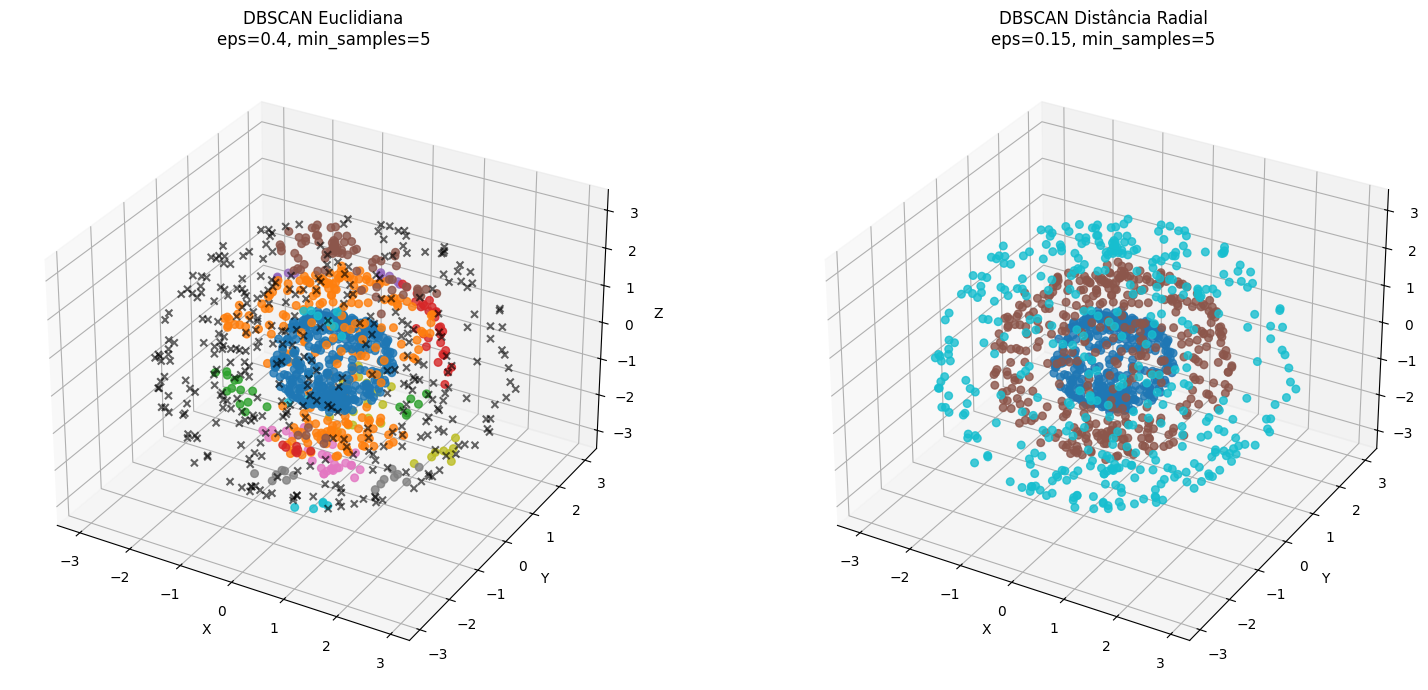

In [ ]:
# Gráfico comparativo entre clusters obtidos por distância Euclidiana e distância Radial

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

# Geração de dados: 3 esferas concêntricas em 3D:
def generate_concentric_spheres(n_points=1000, radii=[1, 2, 3], noise=0.05):
    X = []
    for r in radii:
        phi = np.random.uniform(0, np.pi, n_points)
        theta = np.random.uniform(0, 2*np.pi, n_points)
        x = r * np.sin(phi) * np.cos(theta)
        y = r * np.sin(phi) * np.sin(theta)
        z = r * np.cos(phi)
        X.append(np.column_stack((x, y, z)))
    X = np.vstack(X)
    X += noise * np.random.randn(*X.shape)
    return X

# Gerar os dados:
X_spheres = generate_concentric_spheres(n_points=400, radii=[1, 2, 3], noise=0.05)

# Parâmetros escolhidos:
# Euclidiana:
eps_euclidean = 0.4
min_samples_euclidean = 5
dbscan_euclidean = DBSCAN(eps=eps_euclidean, min_samples=min_samples_euclidean)
labels_euclidean = dbscan_euclidean.fit_predict(X_spheres)

# Radial:
eps_radial = 0.15
min_samples_radial = 5
def radial_distance(X):
    norms = np.linalg.norm(X, axis=1)
    return np.abs(norms[:, None] - norms[None, :])

dbscan_radial = DBSCAN(eps=eps_radial, min_samples=min_samples_radial, metric='precomputed')
D_radial = radial_distance(X_spheres)
labels_radial = dbscan_radial.fit_predict(D_radial)

# Visualização comparativa 3D:
fig = plt.figure(figsize=(16, 7))

# Euclidiana:
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
unique_labels_e = np.unique(labels_euclidean)
colors_e = plt.cm.tab10(np.linspace(0, 1, len(unique_labels_e)))

for k, label in enumerate(unique_labels_e):
    mask = labels_euclidean == label
    if label == -1:
        ax1.scatter(X_spheres[mask, 0], X_spheres[mask, 1], X_spheres[mask, 2],
                    c='black', marker='x', s=25, alpha=0.6, label='Ruído')
    else:
        ax1.scatter(X_spheres[mask, 0], X_spheres[mask, 1], X_spheres[mask, 2],
                    c=[colors_e[k]], s=30, alpha=0.8, label=f'Cluster {label}')

ax1.set_title(f"DBSCAN Euclidiana\neps={eps_euclidean}, min_samples={min_samples_euclidean}")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")

# Radial:
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
unique_labels_r = np.unique(labels_radial)
colors_r = plt.cm.tab10(np.linspace(0, 1, len(unique_labels_r)))

for k, label in enumerate(unique_labels_r):
    mask = labels_radial == label
    if label == -1:
        ax2.scatter(X_spheres[mask, 0], X_spheres[mask, 1], X_spheres[mask, 2],
                    c='black', marker='x', s=25, alpha=0.6, label='Ruído')
    else:
        ax2.scatter(X_spheres[mask, 0], X_spheres[mask, 1], X_spheres[mask, 2],
                    c=[colors_r[k]], s=30, alpha=0.8, label=f'Cluster {label}')

ax2.set_title(f"DBSCAN Distância Radial\neps={eps_radial}, min_samples={min_samples_radial}")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")

plt.tight_layout()
plt.show()






In [ ]:
#Comente brevemente qual configuração foi melhor e por quê a métrica radial ajuda nesse dataset:

#    A métrica radial ajuda porque os pontos estão organizados em esferas concêntricas com clusters perfeitamente separados, cada esfera corresponde a um cluster.

#    A métrica euclidiana confunde pontos de esferas diferentes que estão próximos no espaço 3D, os clusters podem se misturar, principalmente na borda da.


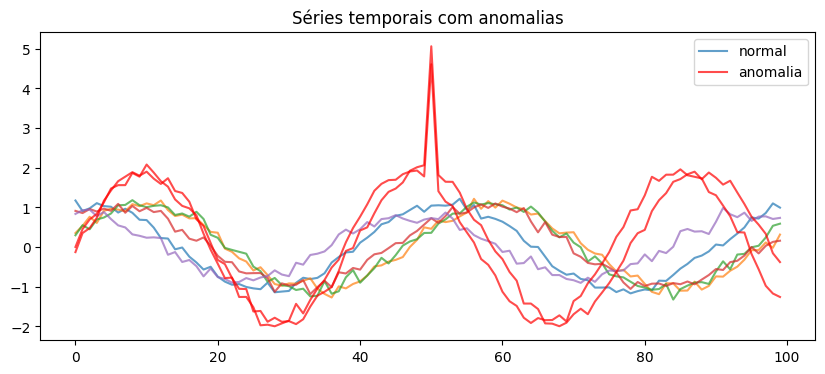

Número de anomalias detectadas (label=-1): 2
Labels únicos: [-1  0]


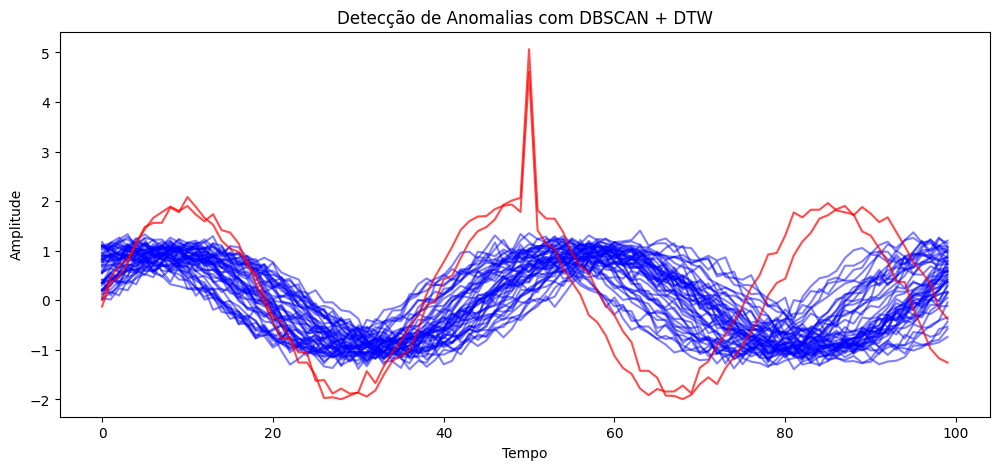

In [ ]:
# Exercício 3: Detecção de Anomalias com DBSCAN + DTW
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
!pip install dtaidistance
from dtaidistance import dtw

# Função DTW:
def dtw_distance(s1, s2):
    n, m = len(s1), len(s2)
    dtw_matrix = np.full((n + 1, m + 1), np.inf)
    dtw_matrix[0, 0] = 0

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(s1[i - 1] - s2[j - 1])
            last_min = min(
                dtw_matrix[i - 1, j],      # inserção
                dtw_matrix[i, j - 1],      # deleção
                dtw_matrix[i - 1, j - 1]   # correspondência
            )
            dtw_matrix[i, j] = cost + last_min

    return dtw_matrix[n, m]

# Gerar dataset de séries temporais com anomalias:
def generate_time_series_dataset(n_series=50, length=100, noise=0.1, n_outliers=2, random_state=42):
    rng = np.random.default_rng(random_state)
    X, y = [], []
    t = np.linspace(0, 4*np.pi, length)

# Séries normais:
    for _ in range(n_series):
        amp = rng.uniform(0.8, 1.2)
        freq = rng.uniform(0.9, 1.1)
        phase = rng.uniform(0, 0.5*np.pi)
        series = amp * np.sin(freq * t + phase) + noise * rng.normal(size=length)
        X.append(series)
        y.append(0) # normal

# Outliers:
    for _ in range(n_outliers):
        amp = rng.uniform(1.5, 2.0)
        freq = rng.uniform(1.2, 1.5)
        series = amp * np.sin(freq * t) + noise * rng.normal(size=length)
        if rng.random() < 0.5:
            series[length//2] += 3  # pico
        else:
            series += rng.normal(2.0, 0.5)  # deslocamento
        X.append(series)
        y.append(-1)  # anomalia

    return np.array(X), np.array(y)

# Gerar dados:
X_series, y_series = generate_time_series_dataset()

# Visualização inicial:
plt.figure(figsize=(10,4))
for i in range(5):
    plt.plot(X_series[i], alpha=0.7, label="normal" if i==0 else "")
for i in range(-2,0):
    plt.plot(X_series[i], alpha=0.7, color="red", label="anomalia" if i==-2 else "")
plt.title("Séries temporais com anomalias")
plt.legend()
plt.show()

# Calcular matriz de distância DTW:
from dtaidistance import dtw

n = len(X_series)
D = np.zeros((n, n))

for i in range(n):
    for j in range(i + 1, n):
        dist = dtw_distance(X_series[i], X_series[j])
        D[i, j] = D[j, i] = dist

# Aplicar DBSCAN usando matriz de distância DTW:
eps = 30.0          # valor inicial, ajustar conforme visualização
min_samples = 3

dbscan_dtw = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
labels = dbscan_dtw.fit_predict(D)

# Contagem de anomalias detectadas:
n_noise = np.sum(labels == -1)
print(f"Número de anomalias detectadas (label=-1): {n_noise}")
print(f"Labels únicos: {np.unique(labels)}")

# Visualização das séries classificadas
plt.figure(figsize=(12,5))
for i in range(n):
    if labels[i] == -1:
        plt.plot(X_series[i], color="red", alpha=0.7)
    else:
        plt.plot(X_series[i], color="blue", alpha=0.5)

plt.title("Detecção de Anomalias com DBSCAN + DTW")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.show()
